In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./fifa_56rows.csv')

<ipython-input-3-6cec62d66366>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./fifa_56rows.csv')


In [4]:
df.head()

,Unnamed: 0,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive
0,0,158023,L. Messi,93,93,78000000.0,320000.0,34,1987-06-24,170,...,95,75,96,24,11,93,64,19,2,1
1,1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,185,...,81,90,88,19,6,86,66,19,3,2
2,2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,1985-02-05,187,...,76,88,95,24,11,86,59,20,3,1
3,3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,1992-02-05,175,...,90,93,93,29,9,89,63,20,3,2
4,4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,181,...,94,83,89,53,13,89,80,21,3,3


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.set_index('sofifa_id',drop=True, inplace=True)

In [8]:
df.head()

,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_name,...,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,93,93,78000000.0,320000.0,34,1987-06-24,170,72,Paris Saint-Germain,...,95,75,96,24,11,93,64,19,2,1
188545,R. Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,185,81,FC Bayern München,...,81,90,88,19,6,86,66,19,3,2
20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,1985-02-05,187,83,Manchester United,...,76,88,95,24,11,86,59,20,3,1
190871,Neymar Jr,91,91,129000000.0,270000.0,29,1992-02-05,175,68,Paris Saint-Germain,...,90,93,93,29,9,89,63,20,3,2
192985,K. De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,181,70,Manchester City,...,94,83,89,53,13,89,80,21,3,3


### Clustering with K-Means

In [63]:
from sklearn.cluster import KMeans

In [64]:
kmeans_model = KMeans(n_clusters=4, random_state=1)
good_columns = df._get_numeric_data().drop(['nation_team_id'],axis=1)
kmeans_model.fit_predict(good_columns)

array([2, 2, 0, ..., 1, 1, 1], dtype=int32)

In [65]:
df['labels'] = kmeans_model.labels_

In [66]:
df['labels'].value_counts()

1    17807
3     1005
0      289
2       64
Name: labels, dtype: int64

### Clustering with DBSCAN

In [67]:
from sklearn.cluster import DBSCAN

In [68]:
dbscan_model = DBSCAN()
dbscan_model.fit_predict(good_columns)

array([-1, -1, -1, ..., -1, -1, -1])

In [69]:
df['labels_DBSCAN'] = dbscan_model.labels_

In [70]:
df['labels_DBSCAN'].value_counts()

-1    19165
Name: labels_DBSCAN, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='wage_eur'>

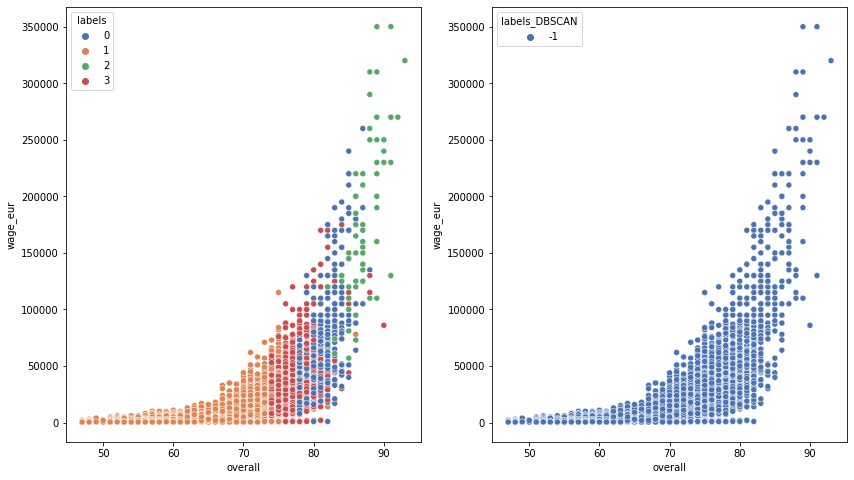

In [71]:
fig, axes = plt.subplots(1,2,figsize=(14,8))

sns.scatterplot(data=df, x='overall', y='wage_eur', hue='labels', ax=axes[0], palette='deep')
sns.scatterplot(data=df, x='overall', y='wage_eur', hue='labels_DBSCAN', ax=axes[1], palette='deep')

### Changing Number of Clusters in K-Means

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


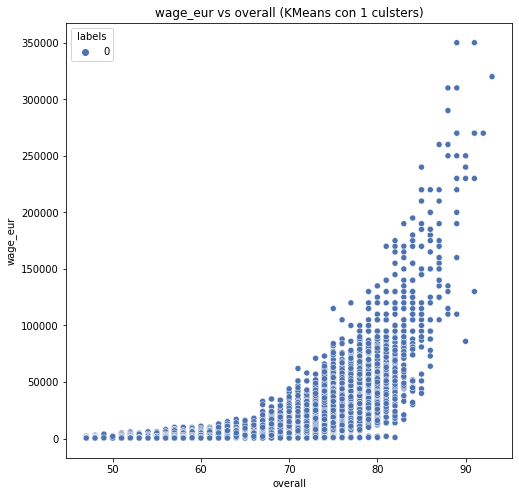

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


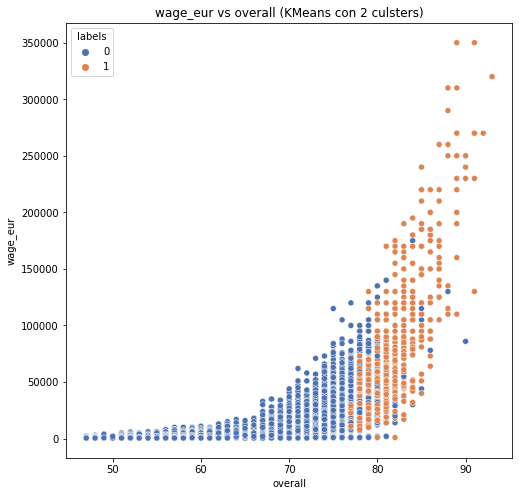

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


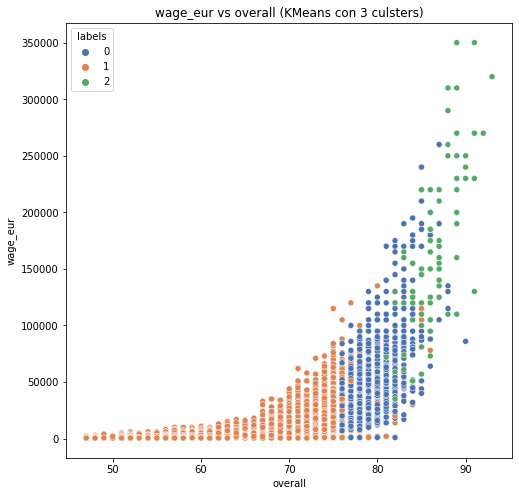

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


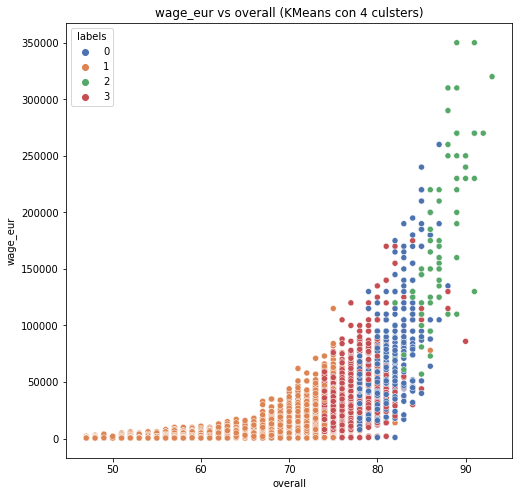

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


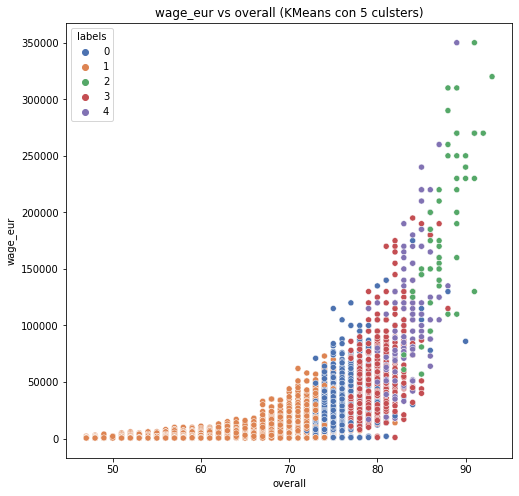

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


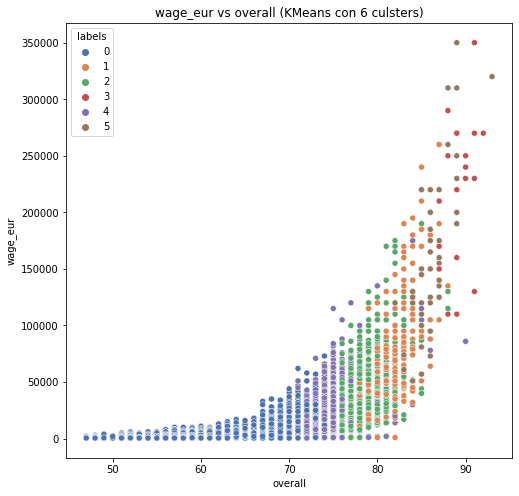

In [81]:
for i in range(6):
    kmeans_model=KMeans(n_clusters=i+1,random_state=1).fit_predict(good_columns)
    df['labels']=kmeans_model
    plt.figure(figsize=(8,8))
    sns.scatterplot(df.overall, df.wage_eur, hue=df.labels, palette='deep')
    plt.title(f'wage_eur vs overall (KMeans con {i+1} culsters)')
    plt.show()

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


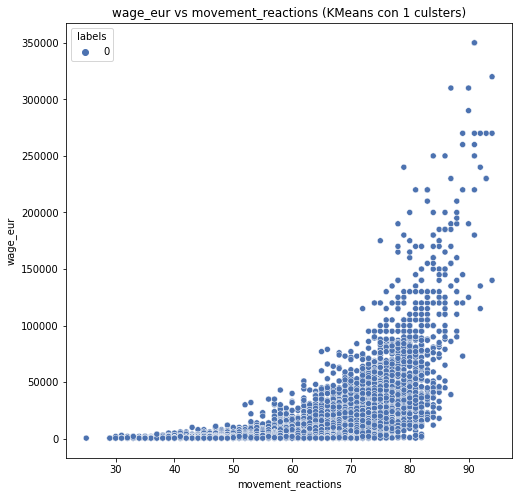

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


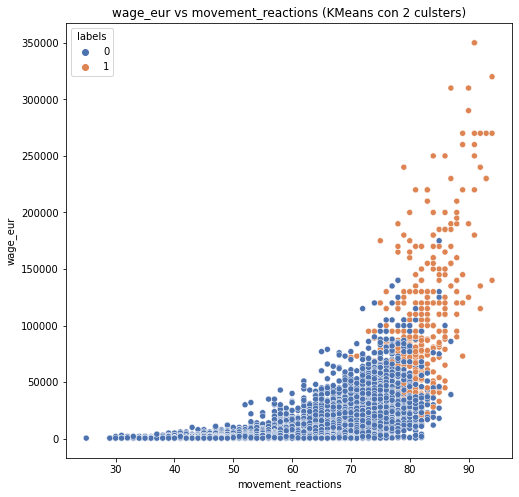

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


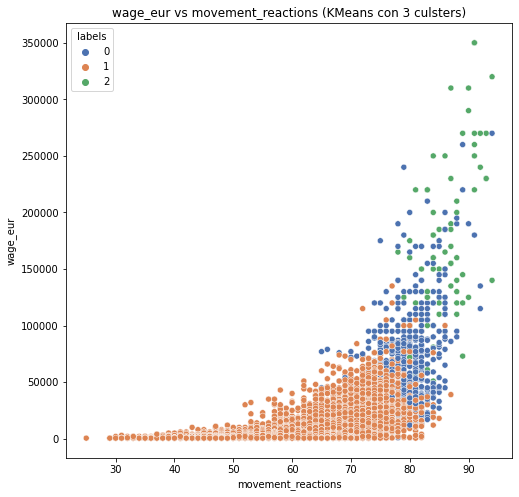

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


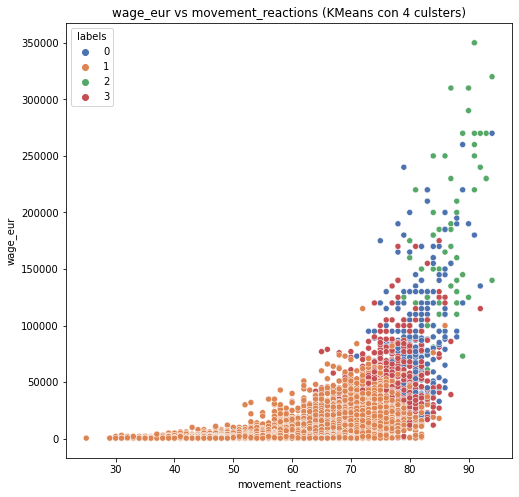

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


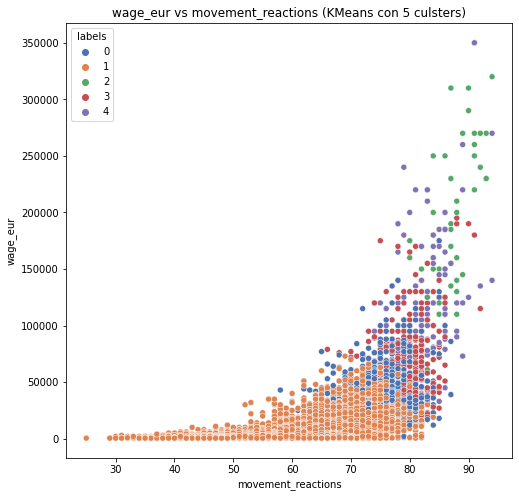

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


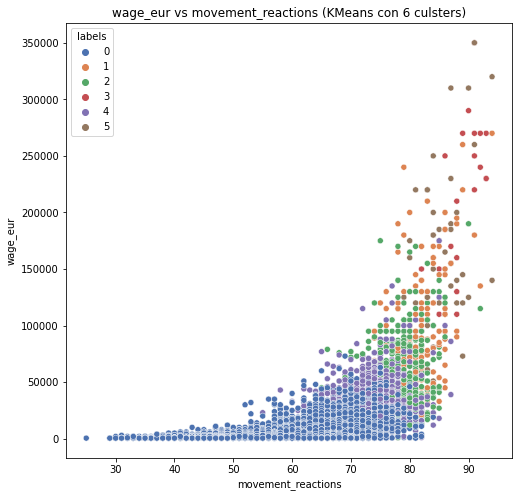

In [82]:
for i in range(6):
    kmeans_model=KMeans(n_clusters=i+1,random_state=1).fit_predict(good_columns)
    df['labels']=kmeans_model
    plt.figure(figsize=(8,8))
    sns.scatterplot(df.movement_reactions, df.wage_eur, hue=df.labels, palette='deep')
    plt.title(f'wage_eur vs movement_reactions (KMeans con {i+1} culsters)')
    plt.show()

### K-Means with 3 clusters

In [85]:
kmeans_model = KMeans(n_clusters=3, random_state=1)
good_columns = df._get_numeric_data().drop(['nation_team_id'],axis=1)
kmeans_model.fit_predict(good_columns)
df['labels'] = kmeans_model.labels_
df['labels'].value_counts()

1    18319
0      768
2       78
Name: labels, dtype: int64

In [88]:
df[df['labels']==2]['league_name'].value_counts()

English Premier League    33
Spain Primera Division    16
Italian Serie A           12
German 1. Bundesliga      10
French Ligue 1             7
Name: league_name, dtype: int64

In [89]:
df[df['labels']==2].columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'dob', 'height_cm', 'weight_kg', 'club_name', 'league_name',
       'league_level', 'club_position', 'club_loaned_from', 'club_joined',
       'nationality_name', 'nation_team_id', 'nation_position',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'pace', 'physic', 'attacking_crossing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_curve', 'skill_fk_accuracy',
       'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions',
       'movement_balance', 'power_shot_power', 'power_jumping',
       'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_sliding_ta

In [90]:
df[df['labels']==2]['league_level'].value_counts()

1.0    78
Name: league_level, dtype: int64

In [91]:
df[df['labels']==1]['league_level'].value_counts()

1.0    14007
2.0     2506
3.0     1168
4.0      611
5.0       27
Name: league_level, dtype: int64

In [94]:
df[(df['labels']==1) & (df['league_level']==1)]['league_name'].value_counts()

USA Major League Soccer                 761
Argentina Primera División              721
Japanese J. League Division 1           586
Turkish Süper Lig                       534
Polish T-Mobile Ekstraklasa             496
French Ligue 1                          485
Belgian Jupiler Pro League              484
Mexican Liga MX                         482
Portuguese Liga ZON SAGRES              465
Holland Eredivisie                      465
Spain Primera Division                  463
Saudi Abdul L. Jameel League            463
English Premier League                  457
German 1. Bundesliga                    449
Romanian Liga I                         442
Chinese Super League                    440
Italian Serie A                         437
Norwegian Eliteserien                   401
Swedish Allsvenskan                     393
Korean K League 1                       336
Campeonato Brasileiro Série A           335
Austrian Football Bundesliga            330
Scottish Premiership            

In [96]:
df[df['labels']==2].groupby('league_name').overall.mean()

league_name
English Premier League    86.757576
French Ligue 1            89.000000
German 1. Bundesliga      86.200000
Italian Serie A           84.916667
Spain Primera Division    86.125000
Name: overall, dtype: float64

In [97]:
df[(df['labels']==1) & (df['league_level']==1)].groupby('league_name').overall.mean()

league_name
Argentina Primera División              67.642164
Australian Hyundai A-League             60.859206
Austrian Football Bundesliga            64.342424
Belgian Jupiler Pro League              66.791322
Campeonato Brasileiro Série A           71.170149
Chilian Campeonato Nacional             63.883871
Chinese Super League                    59.790909
Colombian Liga Postobón                 64.099476
Croatian Prva HNL                       68.290909
Cypriot First Division                  65.178571
Czech Republic Gambrinus Liga           71.586667
Danish Superliga                        63.069182
Ecuadorian Serie A                      64.111111
English Premier League                  68.735230
Finnish Veikkausliiga                   62.640000
French Ligue 1                          69.160825
German 1. Bundesliga                    69.171492
Greek Super League                      70.654545
Holland Eredivisie                      65.832258
Hungarian Nemzeti Bajnokság I         